# Introduction

In this notebook, we will learn about unsupervised methods for clustering and dimensionality reduction.

## Table of Content

- [0. Packages](#0)
- [1. Unsupervised Leearning](#1)
- [2. Dataset](#2)
- [3. Dimensionality Reduction](#3)
    - [3.1 PCA](#3-1)
    - [3.2 LDA](#3-2)
    - [3.3 NMF](#3-3)
    - [3.4 Kernel PCA](#3-4)
    - [3.5 tSNE](#3-3)
    - [3.6 ISOMAP](#3-2)
- [4. Clustering](#4)
    - [4.1. KMeans](#4-1)
    - [4.2. DBScan](#4-2)
    - [4.3. Hierarchical Clustering](#4-3)


# 0. Packages <a name="0"></a>

In this session, we will make use of the following packages:
- [PathLib](https://docs.python.org/3/library/pathlib.html) is a convenient library to work with path names.
- [NumPy](https://docs.scipy.org/doc/numpy/) is a popular library for scientific computing.
- [matplotlib](https://matplotlib.org/3.1.1/contents.html) is a plotting library compatible with numpy.
- [pandas](https://pandas.pydata.org/docs/) is what we'll use to manipulate our data.
- [sklearn](https://scikit-learn.org/stable/index.html) will be used to measure the performance of our model.

Run the next cell to import the necessary packages mentioned before. Besides, we will add more packages as needed while progressing in this session.

In [1]:
# Good practice to use short but clear aliases for the imported libraries
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# For 3d plotting
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sklearn
# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

<a name="1"></a>
# 1. Unsupervised Learning

> Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs. It forms one of the three main categories of machine learning, along with supervised and reinforcement learning. Semi-supervised learning, a related variant, makes use of supervised and unsupervised techniques.<br/><br/>
Two of the main methods used in unsupervised learning are **principal component** and **cluster analysis**. Cluster analysis is used in unsupervised learning to group, or segment, datasets with shared attributes in order to extrapolate algorithmic relationships. Cluster analysis is a branch of machine learning that groups the data that has not been labelled, classified or categorized. Instead of responding to feedback, cluster analysis identifies commonalities in the data and reacts based on the presence or absence of such commonalities in each new piece of data. This approach helps detect anomalous data points that do not fit into either group.<br/><br/>
A central application of unsupervised learning is in the field of density estimation in statistics,though unsupervised learning encompasses many other domains involving **summarizing** and **explaining data features**. It could be contrasted with supervised learning by saying that whereas supervised learning intends to infer a conditional probability distribution $pX(x|y)$ conditioned on the label $y$ of input data; unsupervised learning intends to infer an a priori probability distribution $pX(x)$.


Source: [Wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)

<a name="2"></a>
## 2 Dataset

In this session, we will be using the GeoLink dataset that used in previous sessions.

**Note:** download data from https://drive.google.com/drive/folders/1EgDN57LDuvlZAwr5-eHWB5CTJ7K9HpDP

Credit to this repo: https://github.com/LukasMosser/geolink_dataset

## Data Disclaimer

All the data serving as an input to these notebooks was generously donated by GEOLINK  
and is CC-by-SA 4.0 

If you use this data please reference the dataset properly to give them credit for their contribution.


## Data Preparation
The geolink dataset we will use in this notebook has been preprocessed. You can find the process of preparation of this dataset in <code>notebook/00 Data Prep/00-mc-prep_geolink_norge_dataset.ipynb</code>

## Load Dataset

Let's load the dataset

In [2]:
interim_locations = Path("../../data/processed/geolink_norge_dataset/")
# Load processed dataset
geolink = pd.read_parquet(interim_locations/'geolink_norge_well_logs_train.parquet').set_index(['Well', 'DEPT'])
geolink

LITHOLOGY_GEOLINK       CALI      RHOB         GR  \
Well    DEPT                                                            
15_9-12 2215.917725        Shaly Silt  14.438001  2.363000  60.285748   
        2216.070068        Shaly Silt  14.633000  2.340000  63.250000   
        2216.222412        Shaly Silt  14.813001  2.314000  61.405998   
        2216.375000        Shaly Silt  14.383001  2.293000  62.561596   
        2216.527344        Shaly Silt  14.202999  2.275000  61.691055   
...                               ...        ...       ...        ...   
7_3-1   4569.153320  Cross Bedded Sst   8.538000  2.643616  50.886002   
        4569.305664  Cross Bedded Sst   8.540000  2.631049  51.219002   
        4569.458008  Cross Bedded Sst   8.548000  2.626054  51.671001   
        4569.610352  Cross Bedded Sst   8.552000  2.624065  51.820999   
        4569.762695  Cross Bedded Sst   8.546000  2.636137  51.327999   

                            DTC      RDEP      RMED  
Well    DEPT                                         
15_9-12 2215.917725  134.253601  0.737006  0.785088  
        2216.070068  129.101868  0.741000  0.840000  
        2216.222412  122.476944  0.752000  0.858000  
        2216.375000  116.908607  0.739962  0.857046  
        2216.527344  115.390953  0.715966  0.886082  
...                         ...       ...       ...  
7_3-1   4569.153320   63.442799  6.727000  6.835000  
        4569.305664   63.450794  6.639000  6.690000  
        4569.458008   63.590557  6.551000  6.520000  
        4569.610352   64.036644  6.464000  6.462185  
        4569.762695   64.322495  6.423000  6.439074  

[1192269 rows x 7 columns]

In [3]:
# Unique Values for Lithology
geolink['LITHOLOGY_GEOLINK'].unique()

array(['Shaly Silt', 'Silt', 'Cinerite', 'Sandy Silt',
       'Calcareous Cement', 'Silty Sand', 'Sandstone', 'Marlstone',
       'Argillaceous Limestone', 'Limestone', 'Silty Shale', 'Coal',
       'Cross Bedded Sst', 'Chalk', 'Porous Limestone', 'Gap', 'Dolomite',
       'Anhydrite', 'Conglomerate', 'Halite', 'Carnallite'], dtype=object)

In [4]:
len(geolink['LITHOLOGY_GEOLINK'].unique())

21

In [5]:
# See all columns
print(geolink.columns)
# See all columns from CALI
print(geolink.columns[1:])

Index(['LITHOLOGY_GEOLINK', 'CALI', 'RHOB', 'GR', 'DTC', 'RDEP', 'RMED'], dtype='object')
Index(['CALI', 'RHOB', 'GR', 'DTC', 'RDEP', 'RMED'], dtype='object')


In [6]:
# There are not missing data in the dataset
geolink.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1192269 entries, ('15_9-12', 2215.9177246) to ('7_3-1', 4569.7626953)
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   LITHOLOGY_GEOLINK  1192269 non-null  object 
 1   CALI               1192269 non-null  float64
 2   RHOB               1192269 non-null  float64
 3   GR                 1192269 non-null  float64
 4   DTC                1192269 non-null  float64
 5   RDEP               1192269 non-null  float64
 6   RMED               1192269 non-null  float64
dtypes: float64(6), object(1)
memory usage: 76.8+ MB


<a name="3"></a>
# 3. Dimensionality Reduction


Source: [Wikipedia](https://en.wikipedia.org/wiki/Dimensionality_reduction)
> Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable. Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics. <br/><br/>
Methods are commonly divided into `linear` and `non-linear` approaches. Approaches can also be divided into `feature selection` and `feature extraction`. Dimensionality reduction can be used for `noise reduction`, `data visualization`, `cluster analysis`, or as an intermediate step to facilitate other analyses.


**The Curse of Dimensionality [Wikipedia](https://en.wikipedia.org/wiki/Curse_of_dimensionality):**

>The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. The expression was coined by Richard E. Bellman when considering problems in dynamic programming. Cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.




Source: [Kaggle](https://www.kaggle.com/arthurtok/principal-component-analysis-with-kmeans-visuals) License: [Apache 2.0]('http://www.apache.org/licenses/LICENSE-2.0)

<a name="3-1"></a>
## 3.1 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) identifies the combination of components (directions in the feature space) that account for the most variance in the data.

<div class="alert alert-info" style="font-size:100%">

**NOTE:** <br>

PCA has a lot of applications in statistics and machine learning, but one of the most popular ones is for data visualisation.
<br/><br/>
For Machine Learning applications, it is useful to visualise the data. You can use PCA to reduce any dimensions into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

</div>

In [7]:
geolink.reset_index()['Well'].unique()

array(['15_9-12', '15_9-13', '15_9-14', '15_9-15', '15_9-17', '15_9-18',
       '15_9-19 B', '15_9-2', '15_9-23', '15_9-4', '15_9-7', '15_9-8',
       '15_9-9', '16_1-2', '16_10-1', '16_10-2', '16_10-3', '16_10-5',
       '16_11-1 S', '16_2-11 A', '16_2-16', '16_2-6', '16_2-7', '16_4-1',
       '16_4-2', '16_5-3', '16_6-1', '16_7-1', '16_7-2', '16_7-3',
       '16_7-4', '16_7-5', '16_7-6', '16_8-1', '16_9-1', '17_11-1',
       '17_4-1', '25_10-10', '25_10-4 R', '25_10-8', '25_10-9', '25_11-1',
       '25_11-15', '25_11-19 S', '25_11-23', '25_11-24', '25_11-5',
       '25_2-14', '25_2-5', '25_2-7', '25_3-1', '25_4-1', '25_4-5',
       '25_5-1', '25_5-3', '25_5-4', '25_6-1', '25_6-2', '25_6-3',
       '25_7-2', '25_8-1', '25_8-5 S', '25_8-7', '25_9-1', '26_4-1',
       '29_3-1', '29_6-1', '30_11-3', '30_2-1', '30_3-2 R', '30_3-3',
       '30_3-4 R', '30_3-5 S', '30_4-1', '30_4-2', '30_6-11', '30_6-14',
       '30_6-22', '30_6-23', '30_6-5', '30_6-8', '30_7-7', '31_2-1',
       '31_2-10',

## Standardise the Data
PCA is affected by scale so we need to scale the features in our data before applying PCA. In this session, we will use `StandardScaler` to help us standardise the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [8]:
from sklearn.preprocessing import StandardScaler

# In our case, we will take a sample of 1,000 data points from one well
#'16_7-4'
#16_9-1
# '33_9-11'
sample_dataset = geolink.xs('15_9-12').sample(n=1000, replace=False, random_state=2020)
# Separating features
X = sample_dataset[list(sample_dataset.columns[1:])]
# Separating target
y = sample_dataset[['LITHOLOGY_GEOLINK']]

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [9]:
X.shape

(1000, 6)

## PCA Projection

Our data has originally 6 features. In code below, we will project the original data which has 6 dimensions to 2 dimensions.


<div class="alert alert-info" style="font-size:100%">

**NOTE:** <br>
It should be noted that after dimensionality reduction, there is not usually  a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.
</div>

In [10]:
# Let's import the PCA module
from sklearn.decomposition import PCA
# We will use 2 components so we can later use a 2d plot. 
pca = PCA(n_components=2)
#We are reducing the dimensions in this step from 6 features to only 2
pca_X = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_X, columns = ['PCA 1', 'PCA 2'])
pca_df.head()

,PCA 1,PCA 2
0,0.724674,-0.222030
1,-1.779298,-0.452978
2,-2.181917,0.501821
3,-0.124977,-0.639301
4,-1.687949,2.133969


In [11]:
# Concat two columns
final_df = pd.concat([pca_df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
final_df.head()

,PCA 1,PCA 2,LITHOLOGY_GEOLINK
0,0.724674,-0.222030,Silty Sand
1,-1.779298,-0.452978,Limestone
2,-2.181917,0.501821,Calcareous Cement
3,-0.124977,-0.639301,Argillaceous Limestone
4,-1.687949,2.133969,Sandstone


In [12]:
# Rename column target 
final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
final_df.head()

,PCA 1,PCA 2,target
0,0.724674,-0.222030,Silty Sand
1,-1.779298,-0.452978,Limestone
2,-2.181917,0.501821,Calcareous Cement
3,-0.124977,-0.639301,Argillaceous Limestone
4,-1.687949,2.133969,Sandstone


In [13]:
# List of lithologies in our dataset
targets = list(final_df['target'].unique())
print(targets)
print('Total:',len(targets))

['Silty Sand', 'Limestone', 'Calcareous Cement', 'Argillaceous Limestone', 'Sandstone', 'Silt', 'Sandy Silt', 'Silty Shale', 'Shaly Silt', 'Coal', 'Cinerite', 'Marlstone', 'Cross Bedded Sst']
Total: 13


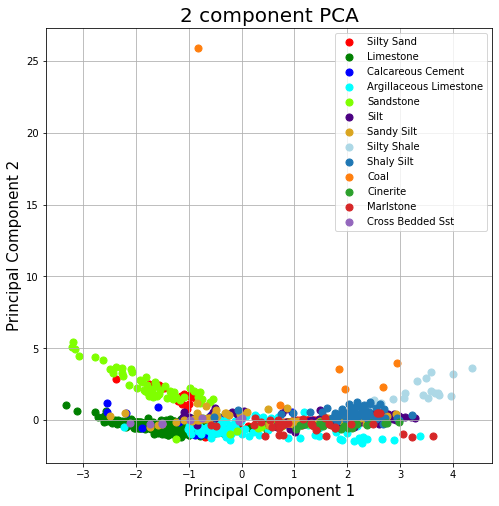

In [14]:
colors = ['r', 'g', 'b', 'aqua','chartreuse','indigo','goldenrod','lightblue','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PCA 1']
               , final_df.loc[indicesToKeep, 'PCA 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<a name="3-2"></a>
## 3.2 Linear Discriminar Analysis (LDA)

Source: [Wikipedia](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
> Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for **dimensionality reduction before later classification**.

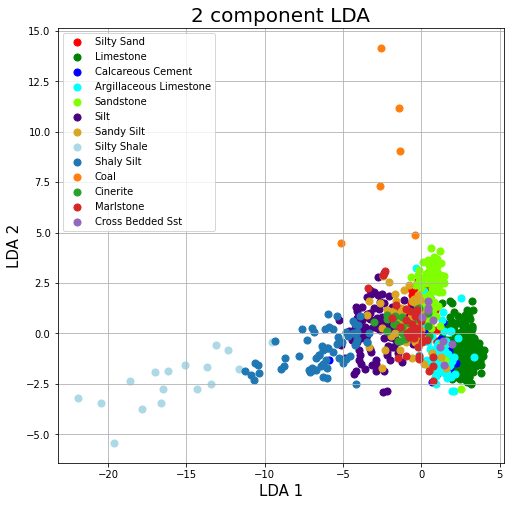

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_X = lda.fit(X, y).transform(X)


lda_df = pd.DataFrame(data=lda_X, columns = ['LDA 1', 'LDA 2'])
# Concatenate two dataframes
final_df = pd.concat([lda_df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
# Rename column
final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
# List of lithologies in our dataset
targets = list(final_df['target'].unique())

# List of colors for the plot
colors = ['r', 'g', 'b', 'aqua','chartreuse','indigo','goldenrod','lightblue','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Plot Images
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'LDA 1']
               , final_df.loc[indicesToKeep, 'LDA 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<a name="3-3"></a>
## 3.3 Non-Negative Matrix Factorization (NMF)
Source: [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)

Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X. This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

In [16]:
print(X.max())
print(X.min())

31.40748833032305
-5.8146345450274834


In order to use NMF, our data cannot contain negative values. For that reason, we wil use `MinMaxScaler` from sklearn which scales the data in a given range. For example, range (0,1).

`MinMaxScaler` is equivalent to the code below:

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_transformed = scaler.transform(X)

In [18]:
print(X_transformed.max())
print(X_transformed.min())

1.0000000000000002
0.0


In [19]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random',random_state=2020)
nmf_X = nmf.fit_transform(X_transformed)

In [20]:
nmf_X.shape

(1000, 2)

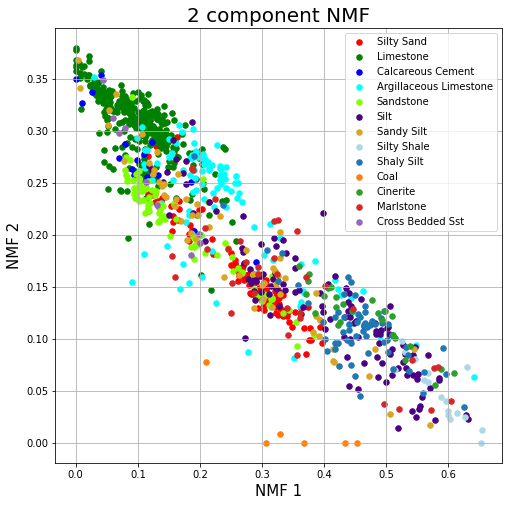

In [21]:
nmf_df = pd.DataFrame(data=nmf_X, columns = ['NMF 1', 'NMF 2'])
# Concatenate two dataframes
final_df = pd.concat([nmf_df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
# Rename column
final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
# List of lithologies in our dataset
targets = list(final_df['target'].unique())

# List of colors for the plot
colors = ['r', 'g', 'b', 'aqua','chartreuse','indigo','goldenrod','lightblue','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Plot Images
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('NMF 1', fontsize = 15)
ax.set_ylabel('NMF 2', fontsize = 15)
ax.set_title('2 component NMF', fontsize = 20)
for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'NMF 1']
               , final_df.loc[indicesToKeep, 'NMF 2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()

<a name="3-4"></a>
## 3.4 Kernel PCA

Source: [Wikipedia](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)
> In the field of multivariate statistics, kernel principal component analysis (kernel PCA) is an extension of principal component analysis (PCA) using techniques of kernel methods.


Source: [Sklearn](https://scikit-learn.org/stable/modules/metrics.html#metrics)

**Kernels**:
> Kernels are measures of similarity, i.e. `s(a, b) > s(a, c)` if objects `a` and `b` are considered “more similar” than objects `a` and `c`. A kernel must also be positive semi-definite.

In [22]:
from sklearn.decomposition import KernelPCA

def kernel_pca(X, kernel):
    transformer = KernelPCA(n_components=2, kernel=kernel)
    X_transformed = transformer.fit_transform(X)
    
    df = pd.DataFrame(data=X_transformed, columns = ['K_PCA 1', 'K_PCA 2'])
    # Concatenate two dataframes
    final_df = pd.concat([df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
    # Rename column
    final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
    # List of lithologies in our dataset
    targets = list(final_df['target'].unique())

    # List of colors for the plot
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Plot Images
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('K_PCA 1', fontsize = 15)
    ax.set_ylabel('K_PCA 2', fontsize = 15)
    ax.set_title(f'2 component KPCA using kernel={kernel}', fontsize = 20)
    for target, color in zip(targets, colors):
        indicesToKeep = final_df['target'] == target
        ax.scatter(final_df.loc[indicesToKeep, 'K_PCA 1']
                   , final_df.loc[indicesToKeep, 'K_PCA 2']
                   , c = color
                   , s = 30)
    ax.legend(targets)
    ax.grid()

Let's reduce the dimensions of the data using different kernels.



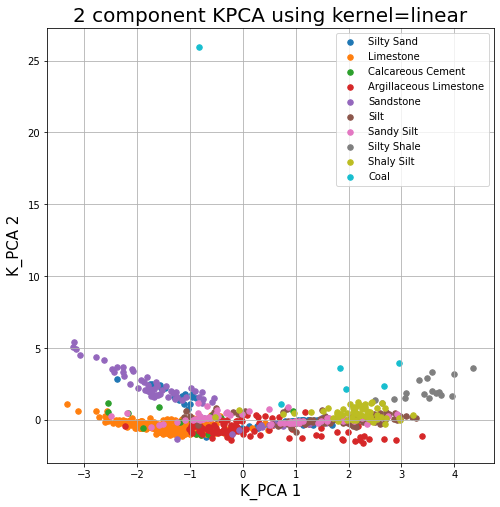

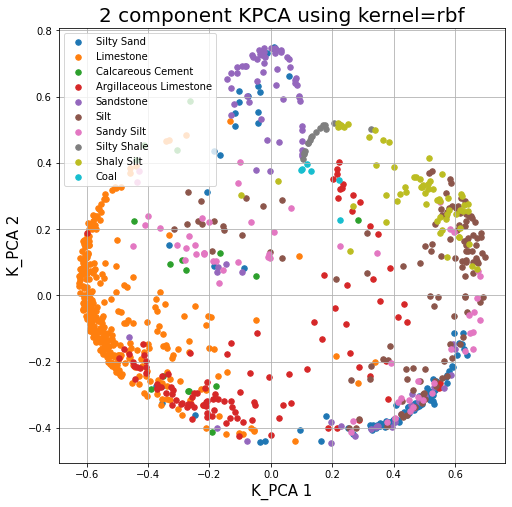

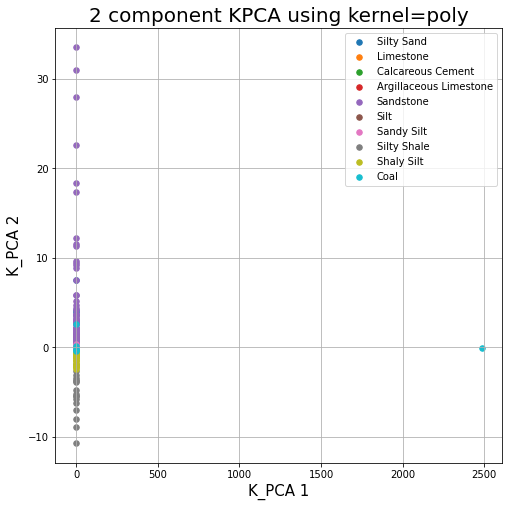

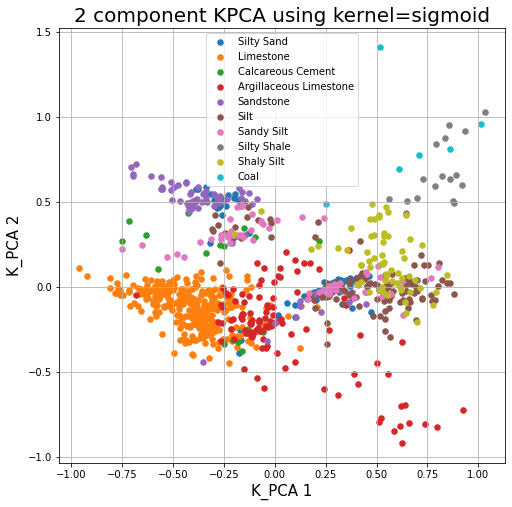

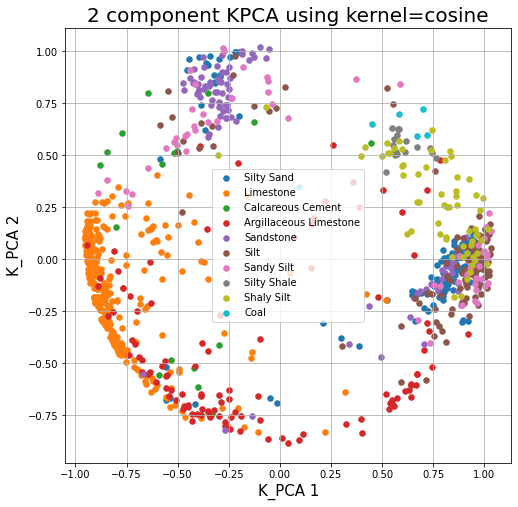

In [23]:
kernels = ['linear','rbf','poly','sigmoid','cosine']

for kernel in kernels:
    kernel_pca(X, kernel)

<a name="3-5"></a>
## 3.5 tSNE

Source: [Wikipedia](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

> T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization developed by Laurens van der Maaten and **Geoffrey Hinton**. It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

Let's try something similar to what we did before using now the tSNE technique.

In [24]:
from sklearn.manifold import TSNE
tsne_X = TSNE(n_components=2).fit_transform(X)
tsne_X

array([[ -7.0979357, -21.629765 ],
       [ 25.634272 ,  16.76808  ],
       [ 25.064215 ,  27.510927 ],
       ...,
       [ -6.361268 , -16.521746 ],
       [-34.82265  , -14.215053 ],
       [ 22.399305 , -16.117085 ]], dtype=float32)

In [25]:
tnse_df = pd.DataFrame(data=tsne_X, columns = ['TNSE 1', 'TNSE 2'])
tnse_df.head()

,TNSE 1,TNSE 2
0,-7.097936,-21.629765
1,25.634272,16.768080
2,25.064215,27.510927
3,16.777605,-13.039948
4,-16.006075,38.037949


In [26]:
y.reset_index()['LITHOLOGY_GEOLINK']

0                  Silty Sand
1                   Limestone
2           Calcareous Cement
3      Argillaceous Limestone
4                   Sandstone
                ...          
995                 Limestone
996                 Sandstone
997                Silty Sand
998                      Silt
999    Argillaceous Limestone
Name: LITHOLOGY_GEOLINK, Length: 1000, dtype: object

In [27]:
# Concat two columns
final_df = pd.concat([tnse_df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
# Rename column target 
final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
final_df.head()

,TNSE 1,TNSE 2,target
0,-7.097936,-21.629765,Silty Sand
1,25.634272,16.768080,Limestone
2,25.064215,27.510927,Calcareous Cement
3,16.777605,-13.039948,Argillaceous Limestone
4,-16.006075,38.037949,Sandstone


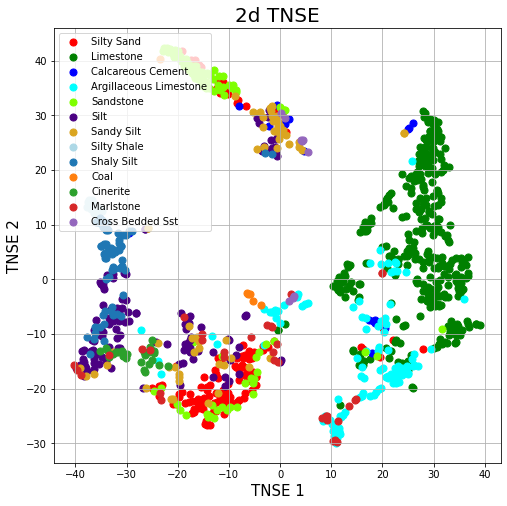

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TNSE 1', fontsize = 15)
ax.set_ylabel('TNSE 2', fontsize = 15)
ax.set_title('2d TNSE', fontsize = 20)

for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'TNSE 1']
               , final_df.loc[indicesToKeep, 'TNSE 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<a name="3-6"></a>
## 3.6 ISOMAP

Source: [Wikipedia](https://en.wikipedia.org/wiki/Isomap)

> Isomap is a nonlinear dimensionality reduction method. It is one of several widely used low-dimensional embedding methods. Isomap is used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points. The algorithm provides a simple method for estimating the intrinsic geometry of a data manifold based on a rough estimate of each data point’s neighbors on the manifold. Isomap is highly efficient and generally applicable to a broad range of data sources and dimensionalities.

In [29]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
isomap_X= isomap.fit_transform(X)

# Isomap Dataframe
isomap_df = pd.DataFrame(data=isomap_X, columns = ['ISOMAP 1', 'ISOMAP 2'])
# Concat two columns
final_df = pd.concat([isomap_df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
# Rename column target 
final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
final_df.head()

,ISOMAP 1,ISOMAP 2,target
0,-1.392077,0.339187,Silty Sand
1,2.330120,-1.274344,Limestone
2,3.524333,0.167568,Calcareous Cement
3,-0.089573,-0.638675,Argillaceous Limestone
4,4.460177,3.774366,Sandstone


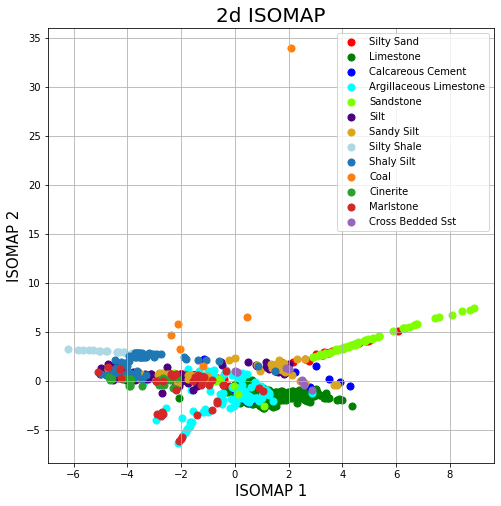

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('ISOMAP 1', fontsize = 15)
ax.set_ylabel('ISOMAP 2', fontsize = 15)
ax.set_title('2d ISOMAP', fontsize = 20)

for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'ISOMAP 1']
               , final_df.loc[indicesToKeep, 'ISOMAP 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<div class="alert alert-success" style="font-size:100%">

**Exercise 1:** <br>
Plot a 2d PCA, Kernel PCA, tsne and ISOMAP for a different well log. Compare and analyse which method worked better for the specific well log selected.
    
**Exercise 2 (Optional):** <br>
Use a different dataset such us the `Titanic` dataset or `iris` dataset and apply different techniques of dimensionality reduction to visualise 2d plots of the data points.
    
</div>

 <a name="4"></a>
# 4. Clustering

> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning. Cluster analysis itself is not one specific algorithm, but the general task to be solved...

Source: [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)


<div class="alert alert-info" style="font-size:100%">

**NOTE:** <br>
Different clustering algorithms have different properties. The example below (Source: [Sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)) shows characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.
    
**Warning:** While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.
    
</div>



<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png' width=800 heigh=800/>



You can explore many different clustering algorithm. They usually have a very similar API in `sklearn` library.

<a name="4-1"></a>
## 4.1 KMeans

> k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.


In the example below, we have some data in a 2d space with 3 clusters. The algorithm will find the best centroids for the 3 clusters in a iterative process:

![kmeans-convergence](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

Source: [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering), [Image](https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif) License Image: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

**How to choose the right number of clusters?**

We will use the **Elbow Method**:

> In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set. <br/><br/>
Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

Let's reduce the dimensions first using TSNE and then we will apply the Kmeans algorithm.

In [31]:
tsne_X = TSNE(n_components=2).fit_transform(X)
tnse_df = pd.DataFrame(data=tsne_X, columns = ['TNSE 1', 'TNSE 2'])
# Concat two columns
final_df = pd.concat([tnse_df, y.reset_index()['LITHOLOGY_GEOLINK']], axis=1)
# Rename column target 
final_df = final_df.rename(columns={'LITHOLOGY_GEOLINK': 'target'})
final_df.head()

,TNSE 1,TNSE 2,target
0,-1.081295,-11.642054,Silty Sand
1,-16.898098,29.563938,Limestone
2,-27.526361,32.353554,Calcareous Cement
3,12.164684,13.859862,Argillaceous Limestone
4,-40.134506,-16.418791,Sandstone


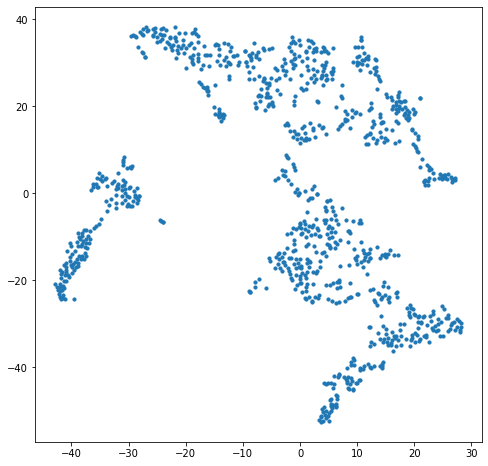

In [32]:
# Plot Manifold
plt.figure(figsize = (8,8))
plt.scatter(final_df['TNSE 1'], final_df['TNSE 2'], s=10);

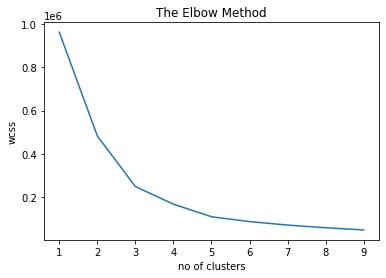

In [33]:
from sklearn.cluster import KMeans
inertia=[]
# we will say that the number of clusters is 10 (total number of different lithologies)
### Static code to get max no of clusters
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=2020)
    kmeans.fit(final_df[['TNSE 1','TNSE 2']])
    inertia.append(kmeans.inertia_)
    #inertia_ is the formula used to segregate the data points into clusters
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,10), inertia)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

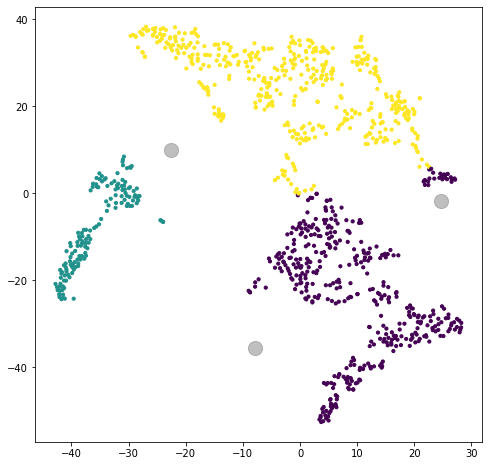

In [34]:
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,10)
##Finally we got that k=4

#Model Build
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=2020)
y_kmeans = kmeans.fit_predict(final_df[['TNSE 2','TNSE 1']])
# Plot the different clusters
plt.figure(figsize = (8,8))
plt.scatter(final_df['TNSE 1'],final_df['TNSE 2'], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
# Plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='gray', s=200, alpha=0.5);

<a name="4-2"></a>
## 4.2 DBScan

> Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

### Why should I use it?

> In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, ACM SIGKDD. As of July 2020, the follow-up paper "DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN" appears in the list of the 8 most downloaded articles of the prestigious ACM Transactions on Database Systems (TODS) journal

***DBSCAN can find non-linearly separable clusters. This dataset cannot be adequately clustered with k-means or Gaussian Mixture EM clustering.***

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/1920px-DBSCAN-density-data.svg.png' width=400 heigh=400>

Source: [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN), [Source Image](https://en.wikipedia.org/wiki/DBSCAN#/media/File:DBSCAN-density-data.svg) License Image: [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)


For the next example we will use the sample data. Source: [Sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

In [35]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
# Helpers to generate data around the centers
from sklearn.datasets import make_blobs

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

Now we will compute DBScan:

In [36]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


DBScan assigns a cluster (positive numeric) label to each data point and -1 if it is considered noise.

In [37]:
print(db.labels_)

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0  2  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2  2  2  0  1  0  1  0  1  0  2  2 -1  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2  2  2  2  0  2  0  2  2  0  2  2  2  0  0
  1  1  1  2  2  2  2  1  2  2  0  0  2  0  0  0  1  0  1  1  1  2  1  1
  0  1  2  2  1  2  2  1  0  0  1  1  1  0  1  0  2  0  2  2  2  2  2  1
  1  0  0  1  1  0  0  2  1 -1  2  1  1  2  1  2  0  2  2  0  1  2  2  0
  2  2  0  0  2  0  2  0  2  1  0  0  0  1  2  1  2  2  0  2  2  0  0  2
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  2

DBScan will help us to determine the number of clusters in our data manifold.

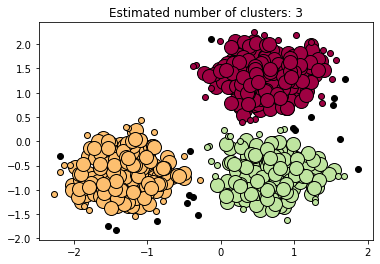

In [38]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<div class="alert alert-success" style="font-size:100%">

**Exercise 3:** <br>
1. Select a Well log from the geolink dataset.
2. Apply DBScan to determine the ideal number of clusters
3. Plot the clusters using the DBScan labels

</div>

# 4.3 Hierarchical Clustering

Source: [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering)

> In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. 
- Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

Examples from: [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), [Feature Agglomerative](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration)


**Example Agglomerative Clustering:**

In [39]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])

**Example Feature Agglomerative:**

In [40]:
from sklearn import datasets, cluster
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
print(X.shape)
agglo = cluster.FeatureAgglomeration(n_clusters=32)
agglo.fit(X)

(1797, 64)


FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
                     connectivity=None, distance_threshold=None, linkage='ward',
                     memory=None, n_clusters=32,
                     pooling_func=<function mean at 0x108766950>)

In [41]:
X_reduced = agglo.transform(X)
X_reduced.shape

(1797, 32)

<div class="alert alert-success" style="font-size:100%">

**Exercise 4 (Optional):** <br>

1. Apply Hierarchical Clustering to the `iris` or`geolink` dataset.
2. Reduce the number of features to 2 and plot a 2-dimensional plot.
</div>

# References and further reading

[Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning)

[Dimensionality Reduction](https://en.wikipedia.org/wiki/Unsupervised_learning)

Clustering:
- [K-means](https://en.wikipedia.org/wiki/K-means_clustering)
- [DBScan](https://en.wikipedia.org/wiki/DBSCAN)
- [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)